# Answers to exercise 1.1
## Most code borrowed from Veronica

Importing different needed packages

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from PIL import Image 
from skimage import transform

import seaborn as sns

from os import walk #Used for getting all the filenames from a given directory !!!!!MAYBE NOT NECESSARY!!!!!
import glob #For finding specific file types


%run -i ../fyp2021p3_group00_functions.py

## Loading in the files

In [2]:
#load all images of type .jpg
im_file_list2 = glob.glob("../data/example_image/*.jpg")
#load all maps of type .png
map_file_list2 = glob.glob("../data/example_segmentation/*.png")

#im_files = sorted(im_file_list2, key = uniq)
im_files = sorted(im_file_list2)
len(im_files)

#map_files = sorted(map_file_list2, key = uniq)
map_files = sorted(map_file_list2)
len(map_files)         


150

In [140]:
# Loading the true file in
true = pd.read_csv('../data/example_ground_truth.csv')

# It is already sorted why it is not sorted as the others

# Making a dictionary to find the id from the index
pic_id = dict()

for i in range(150):
    pic_id[i] = true['image_id'][i]
    


## Loading images into a list

In [4]:
#Load in all .jpg files from the 'example_image' folder
images = [plt.imread(file) for file in im_files]
#Load in all .png files from the 'example_segmentation' folder
maps = [plt.imread(file) for file in map_files]

## Explore an image from the dataset

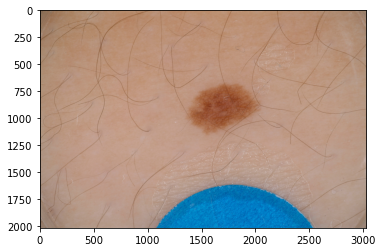

In [4]:
# Load an image and display it

im = plt.imread('../data/example_image/ISIC_0001769.jpg')
plt.imshow(im)

In [5]:
#A color image is a array with 3 dimensions (x, y, R-G-B color channels) of integers

print(im.shape)
print(im.dtype)

#Other packages might wrap the image in a different class - you are allowed to use those if you want

(2016, 3024, 3)
uint8


[  0 121 196]


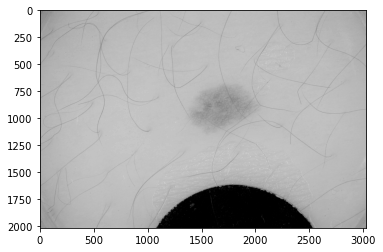

In [6]:
# Get a single RGB value from the blue circle (marker used by dermatologist)
print(im[2000,2000,:])

# Show only the red channel
plt.imshow(im[:,:,0], cmap='gray')

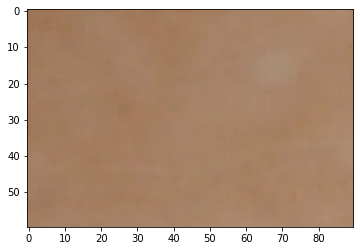

In [7]:
# Display only a part of the image

im_part = im[60:120,130:220,:]
plt.imshow(im_part)

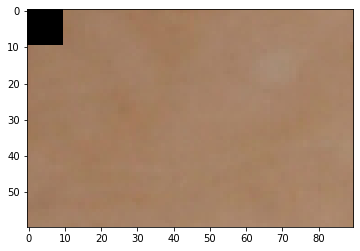

In [8]:
# Modify the image by setting some pixels to black

im_copy = im_part.copy()


im_copy[0:10,0:10,:] = np.tile(0, [10, 10, 3])
plt.imshow(im_copy)

(2016, 3024)
float32


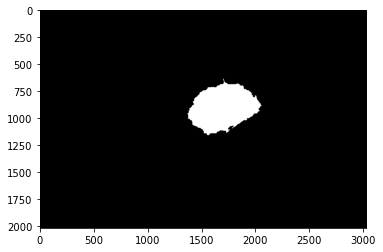

In [9]:
# Load the mask and display it

mask= plt.imread('../data/example_segmentation/ISIC_0001769_segmentation.png')
plt.imshow(mask, cmap='gray')
print(mask.shape)
print(mask.dtype)

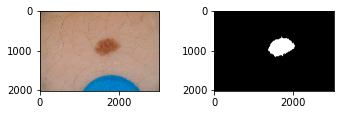

In [10]:
# Show image and mask side by side

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(im)
axes[1].imshow(mask, cmap='gray')
fig.tight_layout()

AttributeError: 'PngImageFile' object has no attribute 'shape'

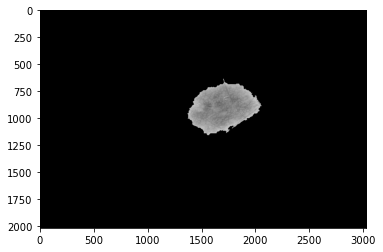

In [11]:
# Show the images overlayed, for this we can use PIL 


# Load images as Image objects  
img1 = Image.open('../data/example_image/ISIC_0001769.jpg') 
img2 = Image.open('../data/example_segmentation/ISIC_0001769_segmentation.png') 

# Overlay - more options such as transparency should be available here  
img2.paste(img1, (0,0), mask = img2) 

#Display
plt.imshow(img2, cmap='gray')

# Note that this is a single channel image
print(img2.shape)

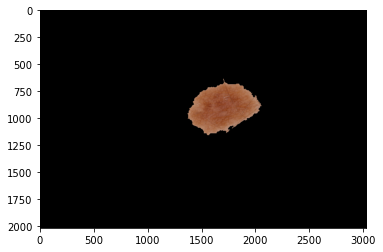

In [12]:
# Alternative: replace the non-lesion pixels

img1 = im.copy()
img1[mask==0] = 0
  
# Display 
plt.imshow(img1)

# You can use any package you prefer, but beware you might need to convert between formats

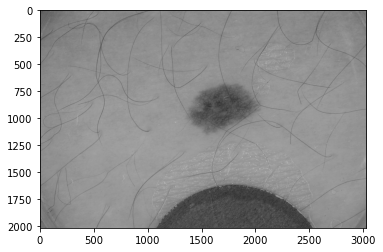

In [13]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

img1 = plt.imread('../data/example_image/ISIC_0001769.jpg')
gray = rgb2gray(img1)

plt.imshow(gray, cmap='gray')

(array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([ 30.8695,  53.1626,  75.4557,  97.7488, 120.0419, 142.335 ,
        164.6281, 186.9212, 209.2143, 231.5074, 253.8005]),
 <a list of 3024 Lists of Patches objects>)

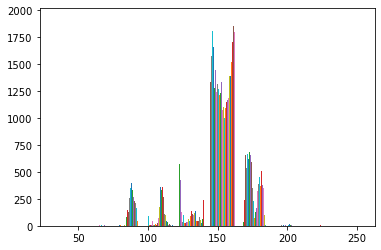

In [14]:
plt.hist(gray)

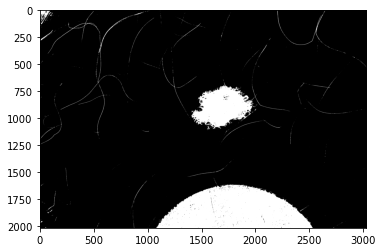

In [15]:
img2 = gray < 120
plt.imshow(img2, cmap='gray')

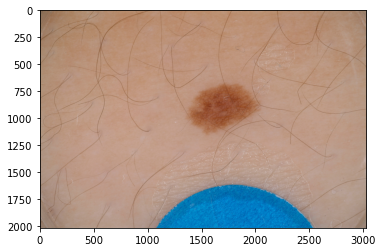

In [16]:
plt.imshow(img1)

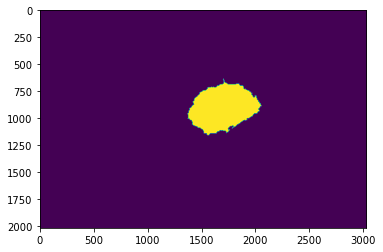

In [17]:
plt.imshow(mask)

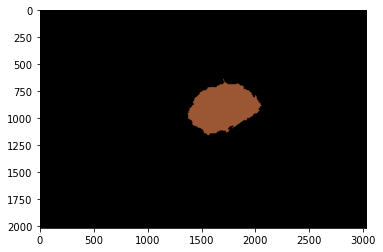

In [18]:
img1 = im.copy() #Copy the OG img

img1[mask!=0] = im[800,1600,:] #where the mask is black the image should also be black (any RGB color can be used)
img1[mask==0] = 0

plt.imshow(img1)

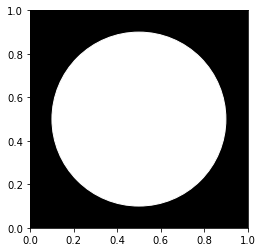

In [19]:
figure, axes = plt.subplots() 
cc = plt.Circle(( 0.5 , 0.5 ), 0.4, color = 'white' ) 
 

axes.set_facecolor('black')

axes.set_aspect( 1 ) 
axes.add_artist( cc ) 

#plt.show()
#plt.savefig('circle.png')


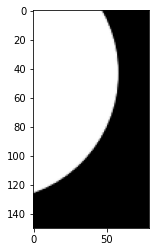

In [20]:
circ = plt.imread('circle.png')
circle = circ[50:250,125:330,:]

plt.imshow(circle)
#plt.imsave('circle.png', circle)

## Converting an image to 1 dimension (Fact check this)

(200, 205)


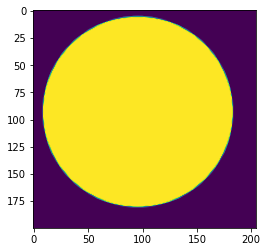

In [5]:
#Converting an image to a 1 dimensional image

circle = Image.open('circle.png').convert('L')

circle = np.asarray(circle)
plt.imshow(circle)

print(circle.shape)

In [93]:
area, perimiter = measure_area_perimeter(circle)

perimiter/area

0.9968693663654334

## Exercise 2

### Expectations for a perfect circle
The area will be pi*r^2 and the perimiter will be 2pi*r

## Scatterplot

In [23]:
areas = []
peris = []
for i in maps:
    area, perimiter = measure_area_perimeter(i)
    areas.append(area)
    peris.append(perimiter)


In [49]:
#np.savetxt("../data/features/perimeter.csv", peris, delimiter=",")

In [64]:
def scatterplot(x, y):
    # Define the size of the figure
    fig = plt.figure(figsize=(4, 3))
    # Set axes, that you want to work with:
    axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
    # actually plot the data:
    axes.scatter(x, y, label = 'Data', edgecolors='white')
    #axes.legend(loc='upper left'); axes.set_xlabel(data); axes.set_ylabel(data); axes.set_title('Scatter plot');
    return None

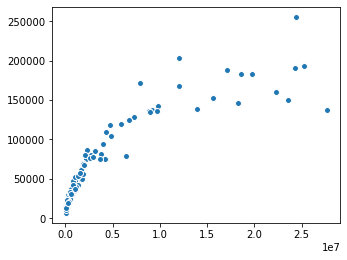

In [65]:
scatterplot(areas, peris)

In [52]:
%run -i ../fyp2021p3_group00_functions.py

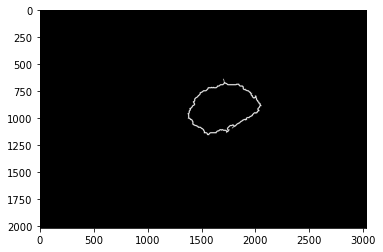

In [45]:
area, perimiter = measure_area_perimeter(mask)

# ABC feature

## Asymmetry

### Finding the center
Thanks to Gino for the idea to the code

(1537, 985)

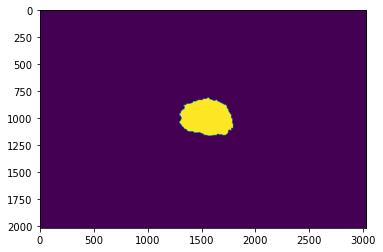

In [20]:
image_mask = maps[1]

borders = np.where(image_mask == 1) # This will return 2 arrays with the index where the pixels are ones
up, down, left, right = max(borders[0]), min(borders[0]), min(borders[1]), max(borders[1])
center = ((left + right)//2, (up+down) //2) # Tuple with the coordinates for the center of the lesion

plt.imshow(maps[1])

center

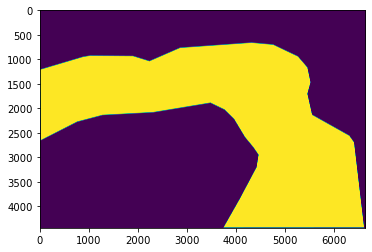

In [39]:
mask = maps[1]

borders = np.where(mask == 1) # This will return 2 arrays with the index where the pixels are ones
left, right = min(borders[1]), max(borders[1])
centerx = (left + right)//2

radiusdiff = (centerx - left) - (right - centerx)

plt.imshow(maps[146])

find the border[1] minimimum and border[1] maximum and then measurre the distance from the center to each of those points, rotate imageg X dergrees and do it again. 
Add the squared difference to a constant and then divide it by the area. 



In [143]:
areas = np.genfromtxt('../data/features/areas.csv', delimiter=',')
perimeters = np.genfromtxt('../data/features/perimeter.csv', delimiter=',')

In [82]:
def assymmetry(mapID):
    mask = maps[mapID]
    
    borders = np.where(mask == 1) # This will return 2 arrays with the index where the pixels are ones
    up, down, left, right = max(borders[0]), min(borders[0]), min(borders[1]), max(borders[1])
    center = ((left + right)//2, (up+down) //2) # Tuple with the coordinates for the center of the lesion
    
    difference = 0
    
    for i in range(18):
        borders = np.where(mask == 1) # This will return 2 arrays with the index where the pixels are ones
        left, right = min(borders[1]), max(borders[1])
        
        
        radiusdiff = (center[0]-left) - (right-center[0])
        difference += radiusdiff**2
        mask = transform.rotate(mask, 10, center = center)
    return difference/areas[mapID]
        

In [87]:
assymmetrylist = []

for i in range(150):
    assymmetrylist.append(assymmetry(i))
    
#np.savetxt("../data/features/assymmetry.csv", assymmetrylist, delimiter=",")

In [165]:
assymmetrypd = pd.DataFrame(assymmetrylist)
areaspd = pd.DataFrame(areas)
peripd = pd.DataFrame(perimeters)
papd = pd.DataFrame(pa)

true['assymmetry'] = assymmetrypd
true['area'] = areaspd
true['perimeter'] = peripd
true['peri/area'] = pa

allfeatures = true

allfeatures['unhealthy'] = 0

for i in range(150):
    if allfeatures['melanoma'][i] == 1 or allfeatures['seborrheic_keratosis'][i] == 1:
        allfeatures['unhealthy'][i] = 1
        
allfeatures

<ipython-input-165-064a2f325617>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allfeatures['unhealthy'][i] = 1


,image_id,melanoma,seborrheic_keratosis,assymmetry,area,perimeter,peri/area,unhealthy
0,ISIC_0001769,0,0,0.082240,216160.0,20601.0,0.095304,0
1,ISIC_0001852,0,0,0.096948,130493.0,14625.0,0.112075,0
2,ISIC_0001871,0,0,0.007147,205116.0,18368.0,0.089549,0
3,ISIC_0003462,0,0,0.018892,161705.0,14381.0,0.088934,0
4,ISIC_0003539,0,0,0.154463,317040.0,21762.0,0.068641,0
...,...,...,...,...,...,...,...,...
145,ISIC_0015443,0,0,0.039940,9732988.0,135731.0,0.013945,0
146,ISIC_0015445,0,0,0.682602,12049938.0,202926.0,0.016840,0
147,ISIC_0015483,0,0,0.034185,8856478.0,136170.0,0.015375,0
148,ISIC_0015496,0,0,0.006164,8951522.0,135296.0,0.015114,0


C:\Users\adagi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


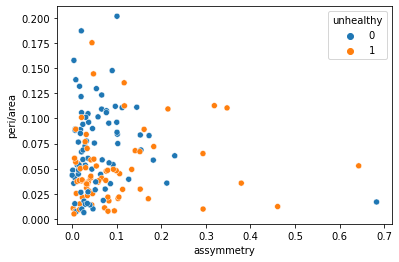

In [169]:
sns.scatterplot('assymmetry', 'peri/area' , hue ='unhealthy', data = true)

C:\Users\adagi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


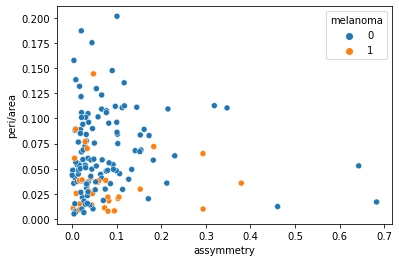

In [160]:
sns.scatterplot('assymmetry', 'peri/area' , hue ='melanoma', data = true)

In [109]:
cancer = []
for num, i in enumerate(assymmetrylist):
    if i > 0.2:
        cancer.append(num)
        
for i in cancer: 
    if true['melanoma'][i] == 1:
        print(i, 'melanomia', assymmetrylist[i])
    elif true['seborrheic_keratosis'][i] == 1:
        print(i, 'seborrheic_keratosis', assymmetrylist[i])
    else:
        print(i, 'no cancer', assymmetrylist[i])

41 no cancer 0.21237566338524078
84 melanomia 0.37933664884947116
91 seborrheic_keratosis 0.21487846886426643
93 seborrheic_keratosis 0.3189304959565857
99 no cancer 0.23015494760864422
101 seborrheic_keratosis 0.4608814277404987
103 melanomia 0.29345921106196826
112 seborrheic_keratosis 0.6426066911718896
113 seborrheic_keratosis 0.3474275125354262
132 melanomia 0.29369890301127266
146 no cancer 0.6826024333071258


## Border

In [50]:
#making the perimiter divided by area feature

pa = []
for i in range(150): 
    area, perimiter = measure_area_perimeter(maps[i])
    pa.append(perimiter/area)
    

In [147]:
# Read in the perimiter divided by area feature file

pa = np.genfromtxt('../data/features/perimeterdivarea.csv', delimiter=',')


In [91]:
sum(true['seborrheic_keratosis'])

42

## The lower the value, the larger chance of cancer

In [96]:
cancer = []
for num, i in enumerate(pa):
    if i < 0.025:
        cancer.append(num)
        
for i in cancer: 
    if true['melanoma'][i] == 1:
        print(i, 'melanomia')
    elif true['seborrheic_keratosis'][i] == 1:
        print(i, 'seborrheic_keratosis')
    else:
        print(i, 'no cancer')

40 seborrheic_keratosis
50 seborrheic_keratosis
85 melanomia
94 melanomia
96 seborrheic_keratosis
101 seborrheic_keratosis
123 melanomia
124 seborrheic_keratosis
125 melanomia
127 melanomia
128 melanomia
129 no cancer
131 melanomia
132 melanomia
133 melanomia
134 no cancer
135 no cancer
136 seborrheic_keratosis
137 melanomia
139 no cancer
140 melanomia
141 melanomia
142 no cancer
143 no cancer
144 no cancer
145 no cancer
146 no cancer
147 no cancer
148 no cancer


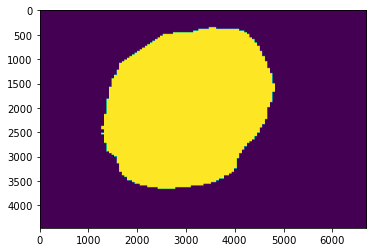

In [110]:
plt.imshow(maps[148])

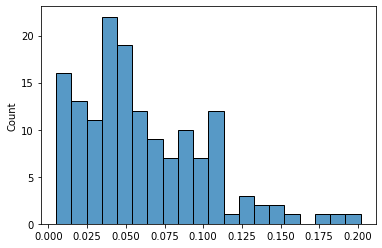

In [88]:
sns.histplot(pa, bins = 20)

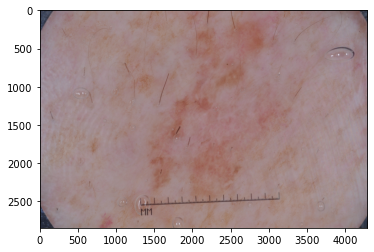

In [46]:
plt.imshow(images[77])

In [76]:
ap = []
for i in range(150): 
    area, perimiter = measure_area_perimeter(maps[i])
    ap.append(area/perimiter)
    
print(ap)

[10.492695, 8.922598, 11.167029, 11.24435, 14.568514, 28.522923, 13.794178, 9.025174, 12.899096, 18.689575, 11.859356, 8.107644, 22.536537, 28.210306, 17.748917, 24.230455, 16.573668, 20.60667, 18.49993, 11.339168, 15.000587, 22.40067, 13.332523, 23.006123, 20.183506, 6.926239, 8.2136965, 6.337401, 8.993502, 22.215929, 27.302107, 11.970299, 6.773002, 13.078338, 13.246975, 11.21738, 17.08972, 17.033361, 10.622711, 10.396165, 46.698406, 28.05936, 13.011368, 9.147767, 9.546489, 7.574385, 9.287051, 20.817852, 24.628443, 33.691296, 49.882046, 11.200427, 18.993328, 27.738312, 11.121689, 17.014202, 9.844925, 20.595984, 21.023653, 7.7116804, 9.4513645, 29.02443, 10.392147, 18.275051, 5.3419657, 9.8845215, 11.74576, 18.584793, 26.867708, 14.590147, 9.448336, 7.2175946, 27.151974, 13.883875, 26.47239, 14.266153, 24.529978, 39.46593, 4.9569664, 26.137978, 17.922194, 18.621845, 32.41824, 19.940683, 28.081839, 55.808357, 26.368767, 35.992283, 25.740467, 11.596121, 33.766075, 9.136834, 16.918642, 8.

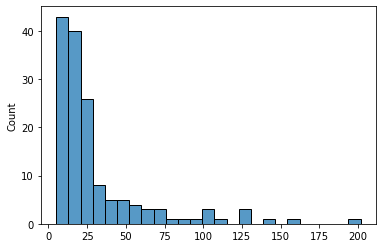

In [77]:
sns.histplot(ap)